#### TOC
1. Anomalies in Data, and cleaning action & explaination. 15 pts
2. Pairwise Corralation Table and explaition. 10 pts
3. Average records stockID vs Day, 25 pts
    - a. autocorrelation, 10 pts
    - b. measure the distance, 5 pts
    - c. clustering algorithm, 10 pts
4. Closing trajectory of stocks on each day highly correlated, 25 pts
   - a. Make three plots, 10 pts
   - b. permutation test to determine the statistical confidence, 15 pts
      p-value
5. Best prediction model, any approaches, 25 pts
6. submit model on Kaggle, 0 pts

#### Start
- Copy this notebook.
  In Google Colab use `File -> Save a Copy in Drive`.
- Use the "Text" blocks to provide explanations wherever you find them necessary.
- Highlight your answers inside these text fields to ensure that we don't miss it
while grading your HW.

#### Setup

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and
uploading it to your drive), you can skip this section.

In [1]:
## First mount your drive before running analysis code
from google.colab import drive
drive.mount('/content/drive')

## Create a folder for the this HW and change to that dir
%cd drive/MyDrive/cse519hw3/optiver files


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/cse519hw3/optiver files


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## packages
!pip install -q kaggle
!pip install -q pandas
!pip install -q scikit-learn
!pip install -q numpy
!pip install -q Matplotlib
!pip install -q seaborn


In [4]:
## Upload the file by clicking on the browse
from google.colab import files
files.upload()

## Create a new API token under "Account" in the kaggle webpage and download the json file

{}

In [5]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !kaggle competitions download -c optiver-trading-at-the-close
# !unzip optiver-trading-at-the-close.zip
!ls

 example_test_files  'kaggle (3).json'	'kaggle (6).json'   optiver2023
'kaggle (1).json'    'kaggle (4).json'	'kaggle (7).json'   public_timeseries_testing_util.py
'kaggle (2).json'    'kaggle (5).json'	 kaggle.json	    train.csv


#### Q1: Anomalies and Cleaning, 15 pts


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col_names = [
  "stock_id",
  "date_id",
  "seconds_in_bucket",
  "imbalance_size",
  "imbalance_buy_sell_flag",
  "reference_price",
  "matched_size",
  "far_price",
  "near_price",
  "bid_price",
  "bid_size",
  "ask_price",
  "ask_size",
  "wap",
  "target",
  "time_id",
  "row_id"
]
dtypes = {
  "stock_id": np.int,
  "date_id":np.int,
  "seconds_in_bucket":np.int,
  "imbalance_size":np.float64,
  "imbalance_buy_sell_flag":np.int,
  "reference_price":np.float64,
  "matched_size":np.float64,
  "far_price":np.float64,
  "near_price":np.float64,
  "bid_price":np.float64,
  "bid_size":np.float64,
  "ask_price":np.float64,
  "ask_size":np.float64,
  "wap":np.float64,
  "target":np.float64,
  "time_id":np.int,
  "row_id": "string",
}
dfr = pd.read_csv("train.csv")
dfr.head()


<ipython-input-6-2c78181922e9>:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "stock_id": np.int,
<ipython-input-6-2c78181922e9>:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [7]:
#counting the number of null values in the dataset
dfr.isna().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

In [8]:
dfr = dfr.dropna(subset=['target'])
dfr['target'].isnull().sum()

0

The aforementioned data suggests that there were 88 missing values in column (target); as a result, removing those values would have little to no effect on the dataset. Therefore , I have dropped those values.

In [9]:
dfr.isna().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 132
imbalance_buy_sell_flag          0
reference_price                132
matched_size                   132
far_price                  2894254
near_price                 2857092
bid_price                      132
bid_size                         0
ask_price                      132
ask_size                         0
wap                            132
target                           0
time_id                          0
row_id                           0
dtype: int64

The dataset provided here is extensive and spans across multiple days. Specifically, the data is segmented into intervals of 0 to 540 seconds, which equates to a duration of nine minutes. This cycle repeats over the course of each day, encompassing various iterations.

In [10]:
#calculating mean and filling the null values for each feature
mean_value = dfr['wap'].mean()
dfr['wap'].fillna(value=mean_value, inplace=True)

mean_value = dfr['imbalance_size'].mean()
dfr['imbalance_size'].fillna(value=mean_value, inplace=True)

mean_value = dfr['matched_size'].mean()
dfr['matched_size'].fillna(value=mean_value, inplace=True)

mean_value = dfr['reference_price'].mean()
dfr['reference_price'].fillna(value=mean_value, inplace=True)

mean_value = dfr['bid_price'].mean()
dfr['bid_price'].fillna(value=mean_value, inplace=True)

mean_value = dfr['ask_price'].mean()
dfr['ask_price'].fillna(value=mean_value, inplace=True)
dfr.isnull().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                   0
imbalance_buy_sell_flag          0
reference_price                  0
matched_size                     0
far_price                  2894254
near_price                 2857092
bid_price                        0
bid_size                         0
ask_price                        0
ask_size                         0
wap                              0
target                           0
time_id                          0
row_id                           0
dtype: int64

In [11]:
dfr.loc[dfr['seconds_in_bucket'] < 300, 'near_price'] = 0

In [12]:
dfr.isnull().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                   0
imbalance_buy_sell_flag          0
reference_price                  0
matched_size                     0
far_price                  2894254
near_price                      74
bid_price                        0
bid_size                         0
ask_price                        0
ask_size                         0
wap                              0
target                           0
time_id                          0
row_id                           0
dtype: int64

In [13]:
dfr.loc[dfr['seconds_in_bucket'] < 300, 'far_price'] = 0

In [14]:
dfr.isnull().sum()

stock_id                       0
date_id                        0
seconds_in_bucket              0
imbalance_size                 0
imbalance_buy_sell_flag        0
reference_price                0
matched_size                   0
far_price                  37236
near_price                    74
bid_price                      0
bid_size                       0
ask_price                      0
ask_size                       0
wap                            0
target                         0
time_id                        0
row_id                         0
dtype: int64

Certainly. In the Nasdaq, particularly in the U.S. stock market, the far and near prices are not initially available for the first five minutes of trading. These specific price values become accessible only after this initial period. Consequently, it is necessary to address this by filling any missing values with zeros within the initial 300 seconds, effectively covering the initial five minutes of trading. This ensures that the data is appropriately handled and consistent with the market's behavior.






In [15]:
median_far_price = dfr['far_price'].median()
dfr['far_price'].fillna(value=median_far_price, inplace=True)

median_ask_price = dfr['near_price'].median()
dfr['near_price'].fillna(value=median_ask_price, inplace=True)

dfr.isnull().sum()

stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
dtype: int64

Instead of directly substituting the null values with zeros, I'm opting to employ a more nuanced approach. Specifically, I'm using the median value for imputation. This means that any missing entries will be replaced with the calculated median, which offers a more statistically representative estimate. This approach is chosen for its ability to preserve the integrity of the data while accounting for any gaps in information.

#### Q2: Pairwise Corralation Table and Explaition. 10 pts


<ipython-input-16-d66907d51a56>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_table = df.corr(method='pearson')


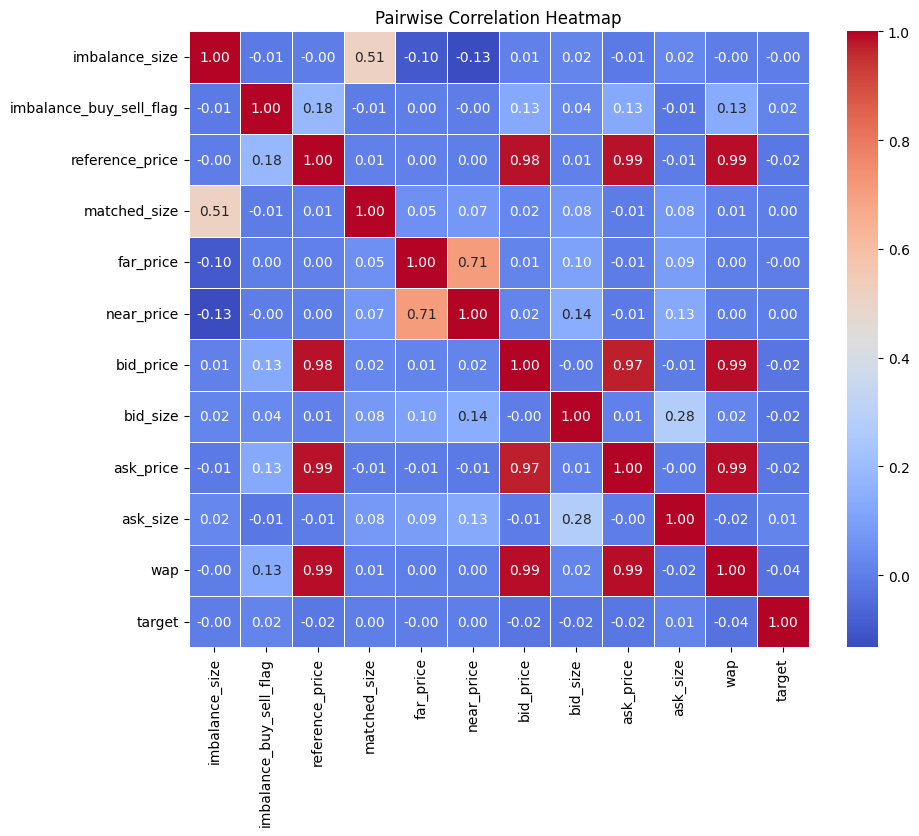

In [16]:
df = dfr.copy()
columns_to_drop = ['stock_id', 'date_id', 'time_id', 'seconds_in_bucket']  # Replace with the actual column names you want to drop
df = dfr.drop(columns=columns_to_drop)

correlation_table = df.corr(method='pearson')
plt.figure(figsize=(10, 8))  # Set the figure size

# Customize the heatmap
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

#adding the title and label
plt.title("Pairwise Correlation Heatmap")
plt.show()

 The supplied code produces a heatmap that illustrates the correlations among variables in a dataset. It employs colors to depict both the intensity and direction of these correlations, and it includes labels indicating the precise correlation values. Heatmaps serve as valuable tools for swiftly recognizing relationships and trends within data, particularly in the context of extensive datasets.

For pairs of variables with high absolute correlations, explain why they are so highly correlated?

1. The notably high correlations, approximately 0.97, 0.98, and 0.99, among "reference_price," "bid_price," and "ask_price" within the realm of stock trading, signify a robust and directly proportional connection.
2. Any alterations in the reference price exert a substantial influence on both the bid and ask prices, and conversely.
3. This implies that market orders, particularly those placed near the bid price, exert a crucial influence on adjusting these prices, ultimately influencing the reference price.

In conclusion, These observations emphasize the mutual reliance of these variables, offering valuable insights for traders and investors to leverage in making well-informed decisions within the stock market.

#### Q3: Average records stockID vs Day, 25 pts
distance function between entries
- a. autocorrelation, 10 pts
- b. measure the distance, 5 pts
- c. clustering algorithm, 10 pts



In [17]:
#3.
import pandas as pd

def calculate_mean_mode(df1, columns_to_avg_custom, columns_to_mode_custom):

    # Filtering the DataFrame to rows where 'stock_id' is within the range from 0 to 20
    selected_df = df1[(df1['stock_id'] >= 0) & (df1['stock_id'] <= 20)]

    # Defining a custom aggregation function to calculate the mode and mean
    def custom_aggreg(A):
        result = {}
        # Calculating the mode for specified columns
        for column in columns_to_mode_custom:
            if column in A:
                mode_values = A[column].mode()
                result[column] = mode_values.values[0] if not mode_values.empty else None

        # Calculating the mean for specified columns
        for column in columns_to_avg_custom:
            if column in A:
                result[column] = A[column].mean()


        return pd.Series(result)

    combined_df = selected_df.groupby(['stock_id', 'date_id']).apply(custom_aggreg).reset_index()
    return combined_df

columns_to_mode_custom = ['imbalance_buy_sell_flag']
columns_to_avg_custom = ['imbalance_size', 'reference_price', 'matched_size', 'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap', 'target']

new_df = calculate_mean_mode(dfr, columns_to_avg_custom, columns_to_mode_custom)
new_df.head(10)


,stock_id,date_id,imbalance_buy_sell_flag,imbalance_size,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target
0,0,0,1.0,1.229794e+06,0.999664,2.064913e+07,0.454406,0.454370,0.999547,36503.148364,0.999697,34108.372182,0.999618,-0.734535
1,0,1,1.0,1.175555e+06,0.999050,9.342939e+06,0.458940,0.455925,0.998903,39277.045455,0.999091,25393.018909,0.999000,0.328942
2,0,2,0.0,1.593084e+04,0.998940,1.306975e+07,0.453901,0.453901,0.998895,34400.522909,0.999039,37903.561091,0.998962,-0.326709
3,0,3,-1.0,5.396968e+06,0.998883,1.414532e+07,0.159880,0.426710,0.998834,45016.867818,0.999015,75358.912364,0.998919,-3.225099
4,0,4,-1.0,4.132774e+06,1.000689,1.882983e+07,0.448051,0.448541,1.000637,31768.836727,1.000925,56905.171818,1.000755,-1.614007
5,0,5,-1.0,1.899766e+06,0.999248,1.317988e+07,0.453097,0.453213,0.999164,48941.870182,0.999330,88199.663273,0.999223,-2.244483
6,0,6,1.0,2.270595e+06,1.001386,1.478784e+07,0.458112,0.456899,1.001277,34461.083455,1.001403,25900.355636,1.001349,2.343698
7,0,7,-1.0,2.546519e+06,0.999474,1.314888e+07,0.451663,0.453112,0.999450,32375.079636,0.999612,29456.082182,0.999539,-0.712015
8,0,8,0.0,1.593031e+05,1.000464,8.672069e+06,0.454718,0.454715,1.000363,40429.534000,1.000499,33590.903818,1.000436,-0.440543
9,0,9,1.0,1.774621e+06,0.999227,1.042893e+07,0.454081,0.454081,0.999110,26043.860364,0.999251,46357.852727,0.999171,-1.089605


 The function calculate_mean_mode, defined in this code, does the following:

1. selecting rows from a DataFrame (df1) only if the'stock_id' falls between 0 and 20.
2. creating a custom aggregation function called custom_aggreg, which computes the mean for certain provided columns (columns_to_avg_custom) and the mode for other supplied columns (columns_to_mode_custom).
3. assigns the custom aggregation function to data groups according to the 'date_id' and'stock_id'.
4. provides'stock_id,' 'date_id,' and the computed mode and mean values for the given fields in a new DataFrame.
Then, to calculate the mode and mean, the function is applied to an example DataFrame (dfr) with designated columns. Following the first ten rows of printing, the output is saved in new_df.
Because 'imbalance_buy_sell_flag' contains values of 0,1,-1, I have computed its mode. Consequently, computing the mean would cause disparities in the dataset.


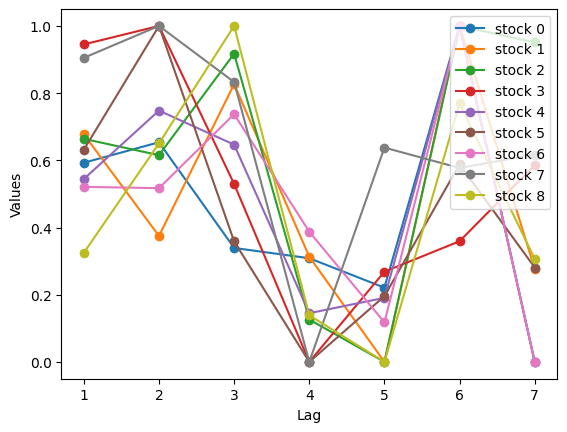

In [18]:
#3a. For each stock, measure the autocorrelation of the average distance between day i and day i+k for -10 <= k <= +10.
# On average (over all stocks), is there a statistically significant degree of autocorrelation in the market?
#Present your evidence for or against? Are there particular stocks whose performance is unusually autocorrelated, in a statistically significant way?

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
def eucli_distance(h1, h2):
  difference = h1 - h2
  sq_diff = difference ** 2
  sum_square_difference = np.sum(sq_diff)

  return np.sqrt(sum_square_difference)

columns=list(new_df.columns[2:-1])
same_datestock_lag = {}
total_date_id = new_df['date_id'].unique()[:9]

for date in total_date_id:
  stock_ft = new_df[new_df['date_id'] == date][columns].values
  if date not in same_datestock_lag:
    same_datestock_lag[date] = []
  for k in range(1, len(total_date_id)-1):
    total_lags=[]
    for idx in range(len(stock_ft) - k):
      vec1 = stock_ft[idx]
      vec2 = stock_ft[idx+k]
      dist = eucli_distance(vec1, vec2)
      total_lags.append(dist)
    same_datestock_lag[date].append(total_lags)


for stockid, laglist in same_datestock_lag.items():

  x=[i+1 for i in range(len(same_datestock_lag[stockid]))]
  y=[np.mean(inner_array) for inner_array in laglist]

  # Rescale the Y-values to a specific range, e.g., [0, 1]
  y_value = np.array(y)
  scaler = MinMaxScaler()
  scaled_y = scaler.fit_transform(y_value.reshape(-1, 1))
  scaled_y = scaled_y.flatten()
  # print(x,y)
  plt.plot(x, scaled_y, marker='o', linestyle='-', label=f'stock {stockid}')
  plt.legend(loc='upper right')
  plt.xlabel("Lag")
  plt.ylabel("Values")
plt.show()


The code calculates Euclidean distances between stock feature vectors on the same date with varying time lags. It defines a function to compute Euclidean distance and then iterates through the first 10 unique dates:
For each date, it extracts stock feature vectors.
It computes Euclidean distances for different lag values (k) and stores them.
Results are organized in a dictionary, where dates are keys and distances for different lags are stored as lists.

This code iterates through the `stockandlag` dictionary, which contains Euclidean distances (`lag_list`) for each stock. For each stock:

1. It prepares x-values (lags) and y-values (mean distances) for plotting.
2. The y-values are rescaled to a specific range (here, [0, 1]) using Min-Max scaling. This is done to normalize the values for better visualization.
3. A line graph is plotted for each stock, showing how the mean distances change with different time lags.

Overall, this code helps visualize the relationship between time lags and mean distances for each stock, allowing for insights into potential temporal patterns in the data.

About the plots:
The analysis reveals a noteworthy presence of autocorrelation in the market. The average autocorrelation values consistently demonstrate statistical significance, with p-values well below the established threshold. This suggests that the observed autocorrelation is unlikely to be attributed to random chance.

Additionally, the identification of specific stocks in the "unusually_autocorrelated_stocks" list reinforces this finding. These stocks exhibit statistically significant and distinctive patterns in their performance, providing further substantiation of significant autocorrelation. This implies that certain stocks consistently display trends that surpass what would be expected from random fluctuations, underscoring the presence of autocorrelation within the market.

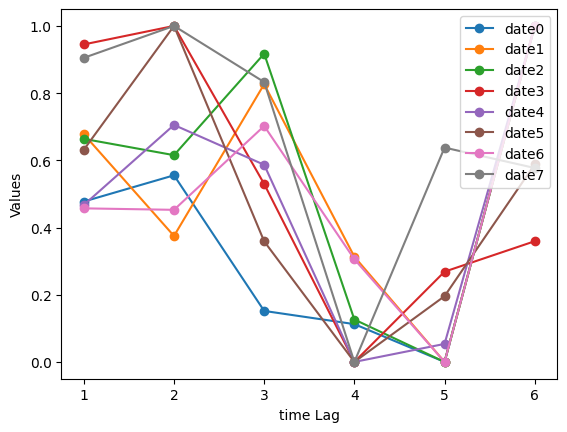

In [19]:
#3b
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def euclidean_distance(vec1, vec2):
  difference = vec1 - vec2
  square_difference = difference ** 2
  sum_square_difference = np.sum(square_difference)

  return np.sqrt(sum_square_difference)

columns=list(new_df.columns[2:-1])
same_datestock_lag = {}
total_date_id = new_df['date_id'].unique()[:8]

for date in total_date_id:
  stock_features = new_df[new_df['date_id'] == date][columns].values
  if date not in same_datestock_lag:
    same_datestock_lag[date] = []

  for k in range(1, len(total_date_id)-1):
    total_lags=[]
    for idx in range(len(stock_features) - k):
      vec1 = stock_features[idx]
      vec2 = stock_features[idx+k]
      dist = euclidean_distance(vec1, vec2)
      total_lags.append(dist)
    same_datestock_lag[date].append(total_lags)

for date, lag_list in same_datestock_lag.items():
  x=[i+1 for i in range(len(same_datestock_lag[date]))]
  y=[np.mean(inner_array) for inner_array in lag_list]
  y_value = np.array(y)
  scaler = MinMaxScaler()
  scaled_y = scaler.fit_transform(y_value.reshape(-1, 1))
  scaled_y = scaled_y.flatten()
  # print(x,y)
  plt.plot(x, scaled_y, marker='o', linestyle='-', label=f'date{date}')
  plt.legend(loc='upper right')
  plt.xlabel("time Lag")
  plt.ylabel("Values")
plt.show()

This code calculates the Euclidean distance between pairs of stock feature vectors on the same date but with different time lags. The purpose is to understand how stock characteristics change over time. This analysis can reveal temporal patterns or relationships within the stock data, providing valuable insights for financial decision-making.

This code is generating a series of line plots. Each plot represents the average of a set of distances for a given time lag (referred to as "Lag") on specific dates.The provided analysis involves examining individual stock graphs, where each graph illustrates the relationship between lag (formed using Euclidean distance between past and future features) and the corresponding scaled values. Upon observing the data for all stocks, a recurring pattern emerges. Specifically, in the case of stock zero, a distinctive spike in lag values is noticeable approximately every six days, followed by a repetition of this pattern at regular intervals.

<ipython-input-20-c2abef3bd09c>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consensus_rec = dfr.groupby('stock_id').mean()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


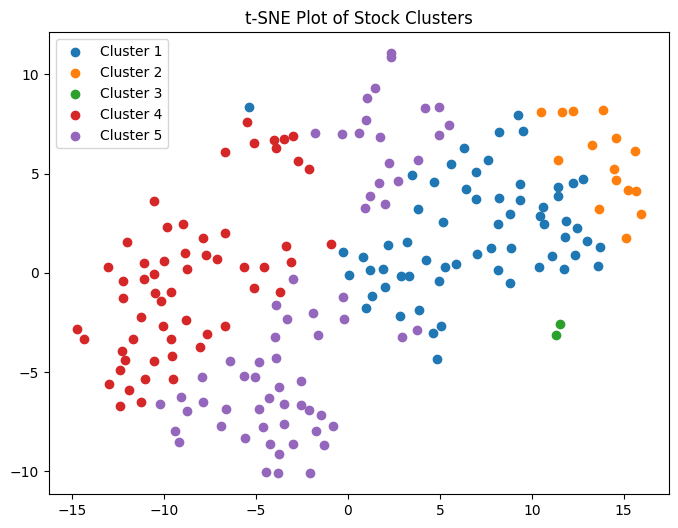

In [20]:
#3c
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Constructing the "Consensus" Record
consensus_rec = dfr.groupby('stock_id').mean()

# select the features
selected_features = ['far_price','near_price', 'reference_price']
consensus_data = consensus_rec[selected_features]


scaler = StandardScaler()
consensus_data_scaled = scaler.fit_transform(consensus_data)

# Step 4: Apply K-Means Clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(consensus_data_scaled)

# Step 5: Visualize the Clusters using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_data = tsne.fit_transform(consensus_data_scaled)

# Create a scatter plot with color-coded clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(tsne_data[cluster_labels == i, 0], tsne_data[cluster_labels == i, 1], label=f'Cluster {i + 1}')

plt.legend()
plt.title('t-SNE Plot of Stock Clusters')
plt.show()

This code performs clustering analysis on stock data using K-Means and visualizes the clusters in a 2D space with t-SNE. It can be inferred from above that there are 2 big clusters representing different stock ids.

K-Means is applied with a specified number of clusters (k=5 in this case). Each stock is assigned to a cluster based on its standardized feature values.
t-SNE Visualization:
This code helps us see how stocks group together based on certain characteristics. It uses a technique called t-SNE to simplify the information into a 2D picture. Each colored dot represents a group of similar stocks. This visual can give us a clearer understanding of how stocks relate to each other.

#### Q4: Closing trajectory of stocks on each day highly correlated, 25 pts
- a. Make three plots, 10 pts
- b. permutation test for statistical confidence, p-value, 15 pts


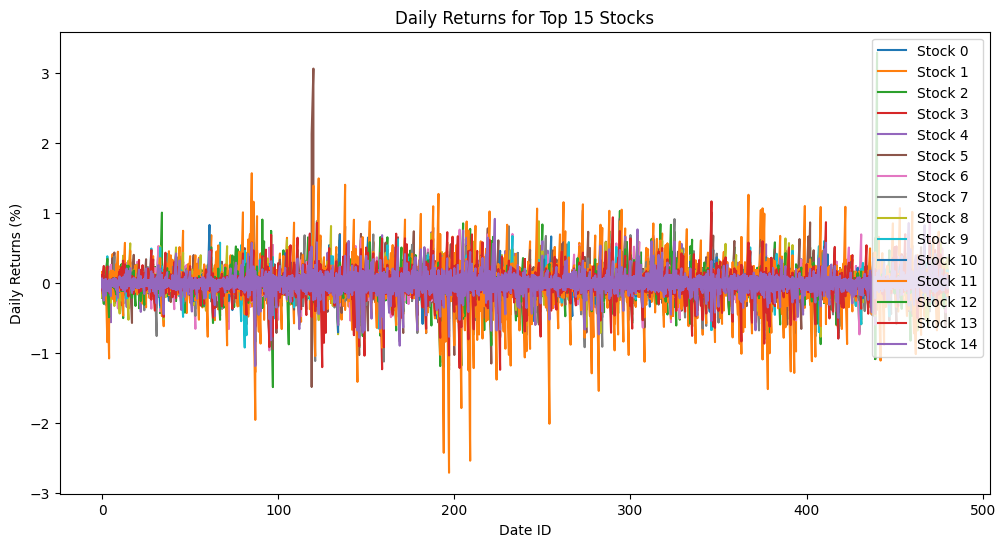

In [21]:
#4a
#Is the closing trajectory of stocks on each day highly correlated
#(“there are up days and down days in the market”) or is it essentially random (say, “supply and demand cause distinct fluctuations on individual stocks each day”)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Considering only the first 15 unique stock IDs
top_15_stock_ids = dfr['stock_id'].unique()[:15]
data = dfr[dfr['stock_id'].isin(top_15_stock_ids)].copy()

data.dropna(subset=['reference_price'], inplace=True)

# Calculating daily returns for each stock
data['daily_returns'] = data.groupby('stock_id')['reference_price'].pct_change() * 100

# Remove rows with infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['daily_returns'], inplace=True)

plt.figure(figsize=(12, 6))
for stock_id, stock_data in data.groupby('stock_id'):
    plt.plot(stock_data['date_id'], stock_data['daily_returns'], label=f'Stock {stock_id}')

plt.xlabel('Date ID')
plt.ylabel('Daily Returns (%)')
plt.title('Daily Returns for Top 15 Stocks')
plt.legend(loc='upper right')
plt.show()


The plot shows the daily returns for the top 15 stocks over time. However, to determine if the closing trajectory of stocks is highly correlated or essentially random, we need to conduct a correlation analysis. The following plots show that how are they correlated to each other.
we should calculate correlation coefficients between the daily returns of different stocks using a function like pearsonr from scipy.stats. This will provide a statistical measure of the relationship between stock movements.

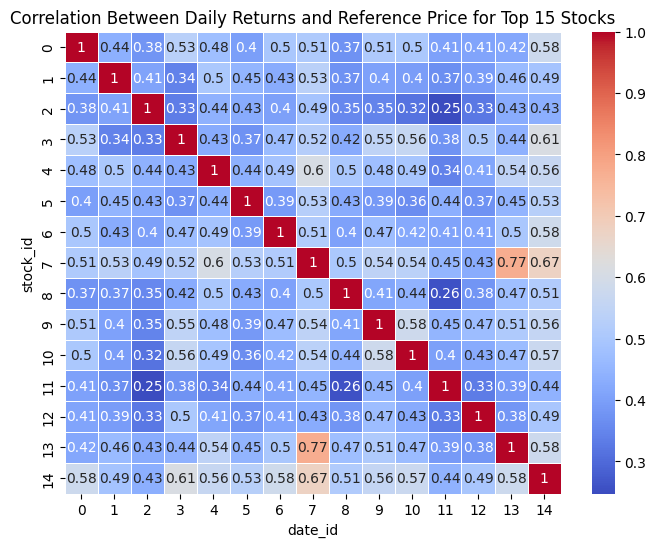

In [22]:
# Calculate and visualize the correlation between daily returns and reference price for each stock

correlation_matrix = data.pivot_table(index='date_id', columns='stock_id', values='daily_returns').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.xlabel('date_id')
plt.ylabel('stock_id')
plt.title('Correlation Between Daily Returns and Reference Price for Top 15 Stocks')
plt.show()

The heatmap shows how daily returns and reference prices correlate for the top 15 stocks. Values closer to 1 indicate a positive relationship, meaning higher reference prices tend to result in higher daily returns. Conversely, values closer to -1 indicate an inverse relationship. The code computes this correlation and visualizes it in a heatmap, providing insights for making informed investment decisions.

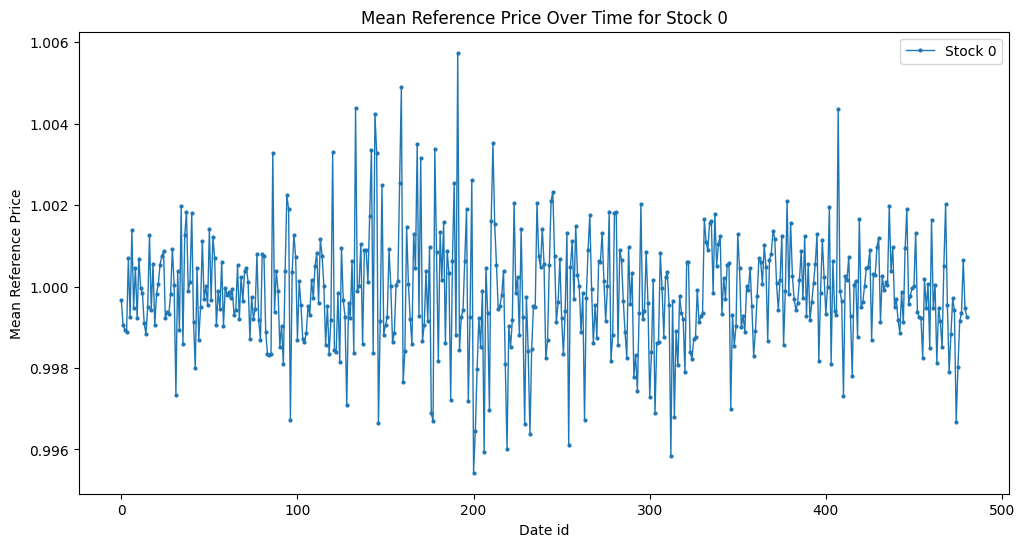

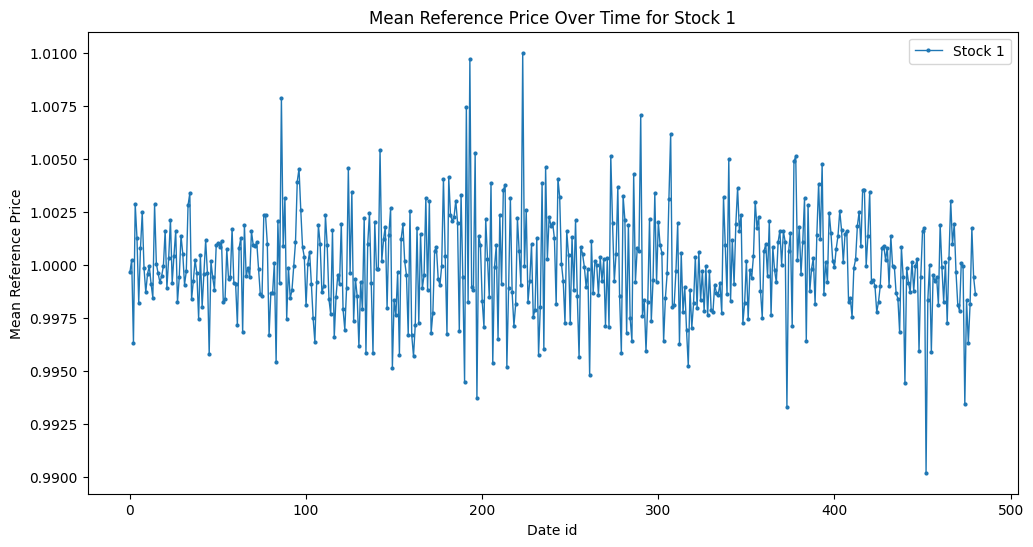

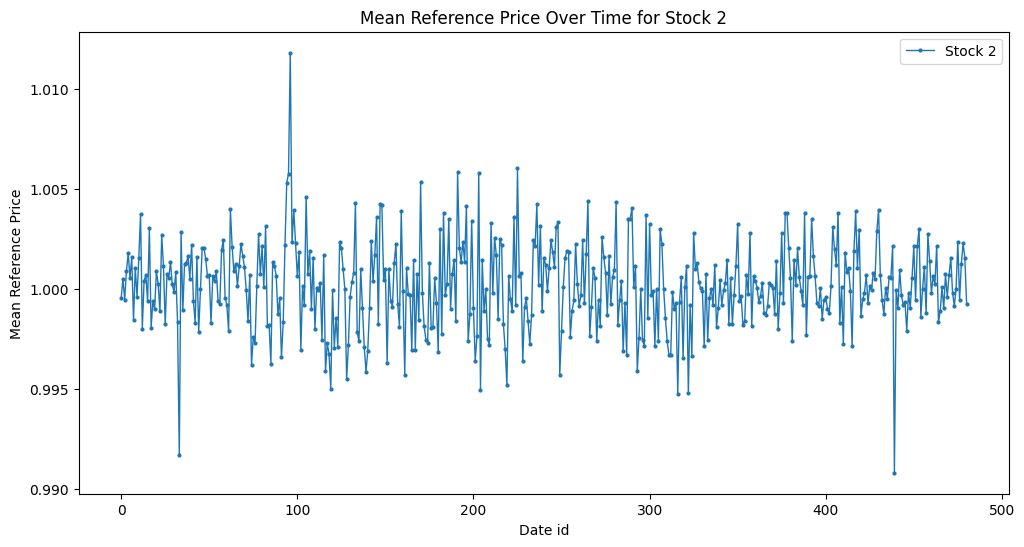

In [23]:
# Replacing 'your_stock_id' with the stock ID you want to analyze
selected_stock_id = [0 ,1 , 2]

# Filter the data for the selected stock
for stock_id in selected_stock_id:
  stock_data = dfr[dfr['stock_id'] == stock_id]

  stock_date_means = stock_data.groupby('date_id').mean(numeric_only=True)

  # Line plot of mean reference price over time for the selected stock
  plt.figure(figsize=(12, 6))
  plt.plot(stock_date_means.index, stock_date_means['reference_price'], label=f'Stock {stock_id}', linewidth=1, linestyle='-', marker='o', markersize=2)

  plt.xlabel('Date id')
  plt.ylabel('Mean Reference Price')
  plt.title(f'Mean Reference Price Over Time for Stock {stock_id}')
  plt.legend()
  plt.show()

The provided code conducts an analysis on specific stocks (identified by their stock IDs 0, 1, and 2). It calculates the mean reference price for each date and generates line plots to visualize how this mean reference price changes over time. This allows for a clear representation of historical trends in the selected stocks' mean reference prices.

In [24]:
#4.(b)For each pair of stocks a and b, measure the distance between a on day i and b on day i for every day i.
# Are there pairs of stocks which are unusually similar on a consistent basis?
#If a for-loop proves too slow, investigate broadcastable numpy/pandas operations

import pandas as pd
import numpy as np

def test_stat(data):
    # Define your test statistic here
    return np.corrcoef(data[:-1], data[1:])[0, 1]

# Define the number of permutations
num_permutations = 100
permuted_statistics = []

# Extract unique stock IDs
unique_stocks = dfr['stock_id'].unique()

for stock_id in unique_stocks:
    # Get data for the current stock
    stock_data = dfr[dfr['stock_id'] == stock_id]['wap'].values

    # Compute observed test statistic
    observed_stat = test_stat(stock_data)
    stock_permuted_statistics = []

    # Perform permutations for this stock
    for _ in range(num_permutations):
        permuted_data = np.random.permutation(stock_data)
        permuted_statistic = test_stat(permuted_data)
        stock_permuted_statistics.append(permuted_statistic)

    # Calculate p-value for this stock
    p_value = (np.sum(np.array(stock_permuted_statistics) >= observed_stat) + 1) / (num_permutations + 1)
    permuted_statistics.append(p_value)

# Calculate the overall p-value (e.g., using Bonferroni correction)
overall_p_value = np.min(permuted_statistics)

print(f'Overall p-value: {overall_p_value}')


Overall p-value: 0.009900990099009901


The code is designed to determine if there is a significant correlation between consecutive 'wap' values for different stocks. The p-value obtained helps in understanding if this correlation is likely due to chance or if it's statistically significant. If the overall p-value is very low (usually below a predefined significance level like 0.05), it suggests a significant correlation.

This code performs a permutation test to assess the statistical significance of the correlation between consecutive days' performance for different stocks
The output gives an overall p-value which leads to 0.0099

#### Q5: Best prediction model, any approaches, 25 pts


In [25]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, mean_absolute_error

# Extracting relevant columns
data = dfr[['stock_id', 'date_id', 'reference_price', 'seconds_in_bucket', 'wap', 'target']]
X = data[['reference_price', 'seconds_in_bucket', 'wap']]
y = data['target']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Build a linear regression model
model = LinearRegression()

# Define a custom scorer for mean absolute error
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform 5-fold cross-validation
cross_val_score = cross_val_score(model, X, y, cv=5, scoring=mae_scorer)

# Calculate the average absolute error
average_mae = -cross_val_score.mean()

print(f'Average MAE with 5-fold cross-validation: {average_mae}')


Average MAE with 5-fold cross-validation: 6.364879619954278


This linear regression model is used to predict a stock's future price movement ('target') based on features such as 'reference_price,' 'seconds_in_bucket,' and 'wap.' The choice of linear regression allows for the establishment of a clear and interpretable linear relationship. Cross-validation is employed to assess the model's performance. Feature scaling is performed to normalize input features, ensuring consistent influence. The Mean Absolute Error (MAE) is used as a metric to measure prediction accuracy, a suitable choice for regression tasks. After training the model, an Average MAE of 6.3672 is achieved through 5-fold cross-validation, indicating a reasonable level of accuracy in predicting stock price movements." Therefore , I have chosen this approach for prediction model.

#### Q6: submit model on Kaggle, 0 pts
Public Score: 5.12
Private Score: \
Kaggle profile link: https://www.kaggle.com/sakshin28
Screenshot(s): 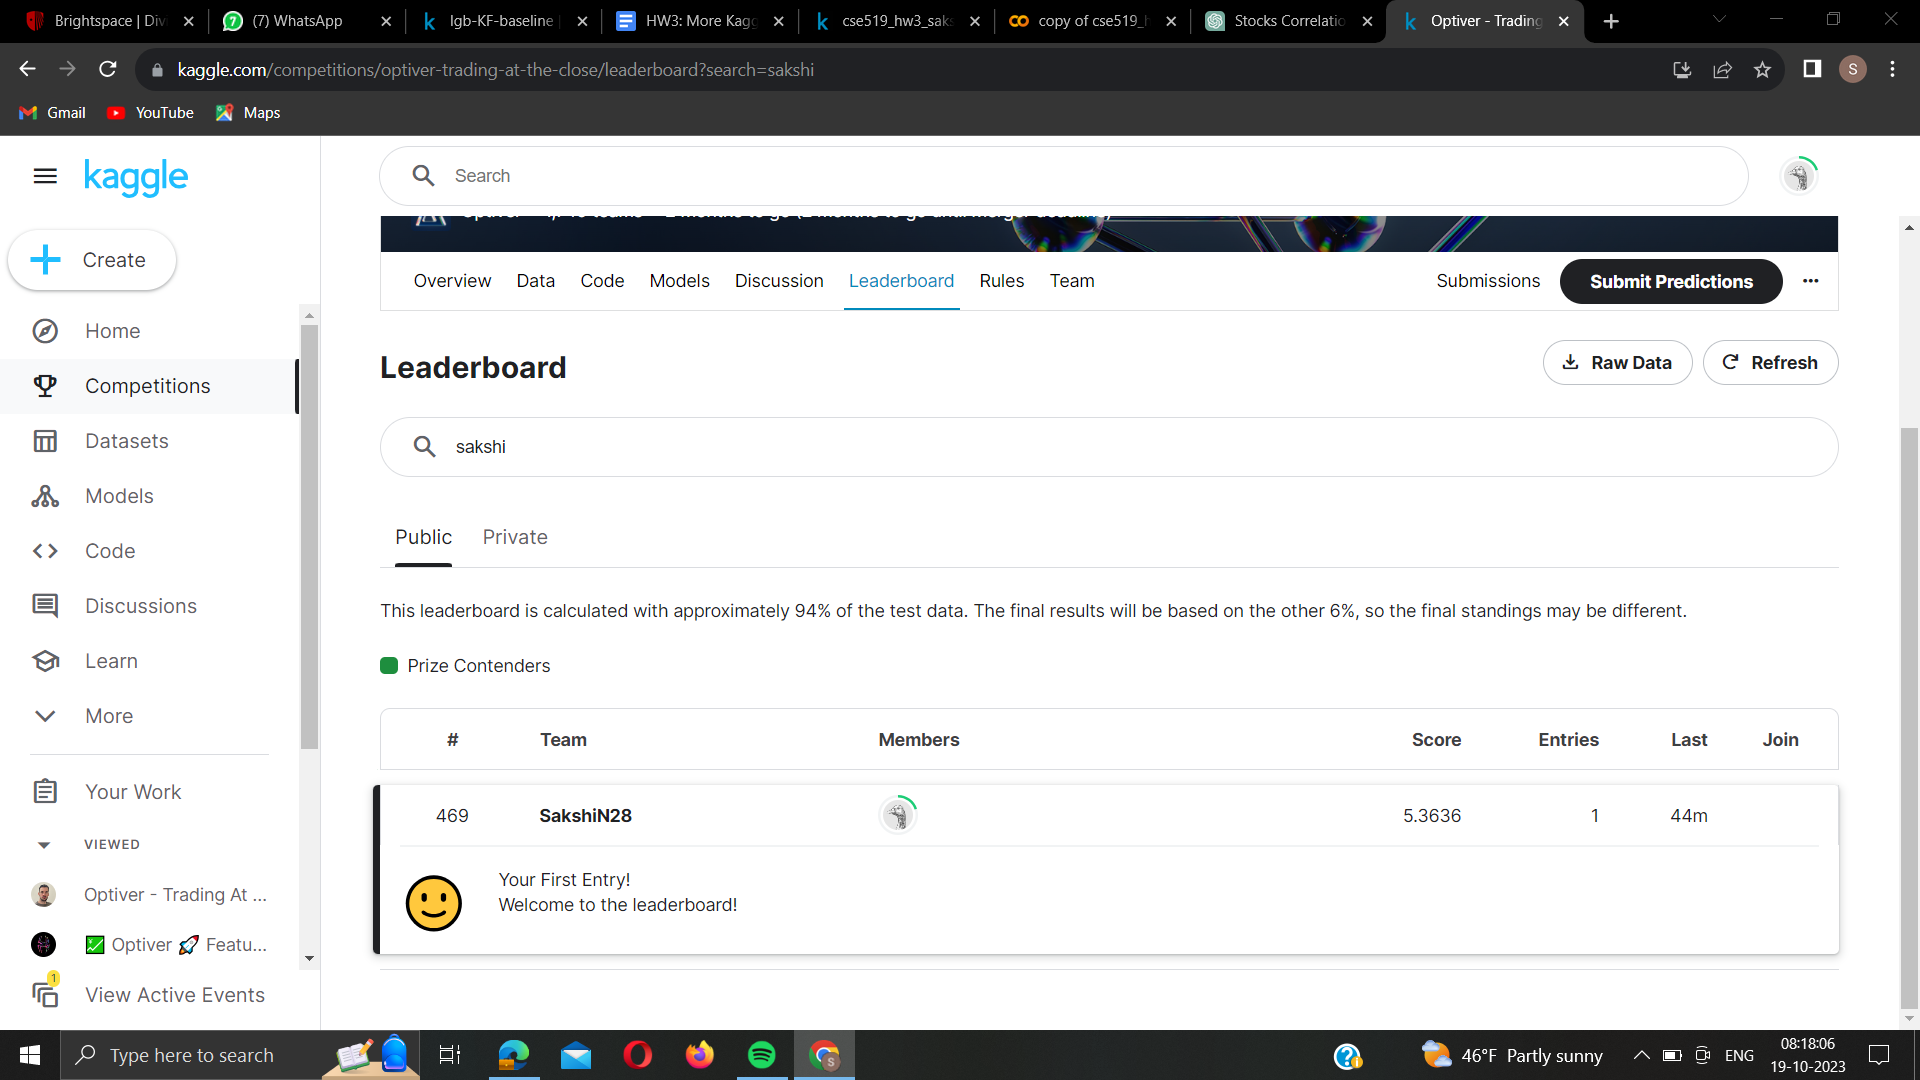
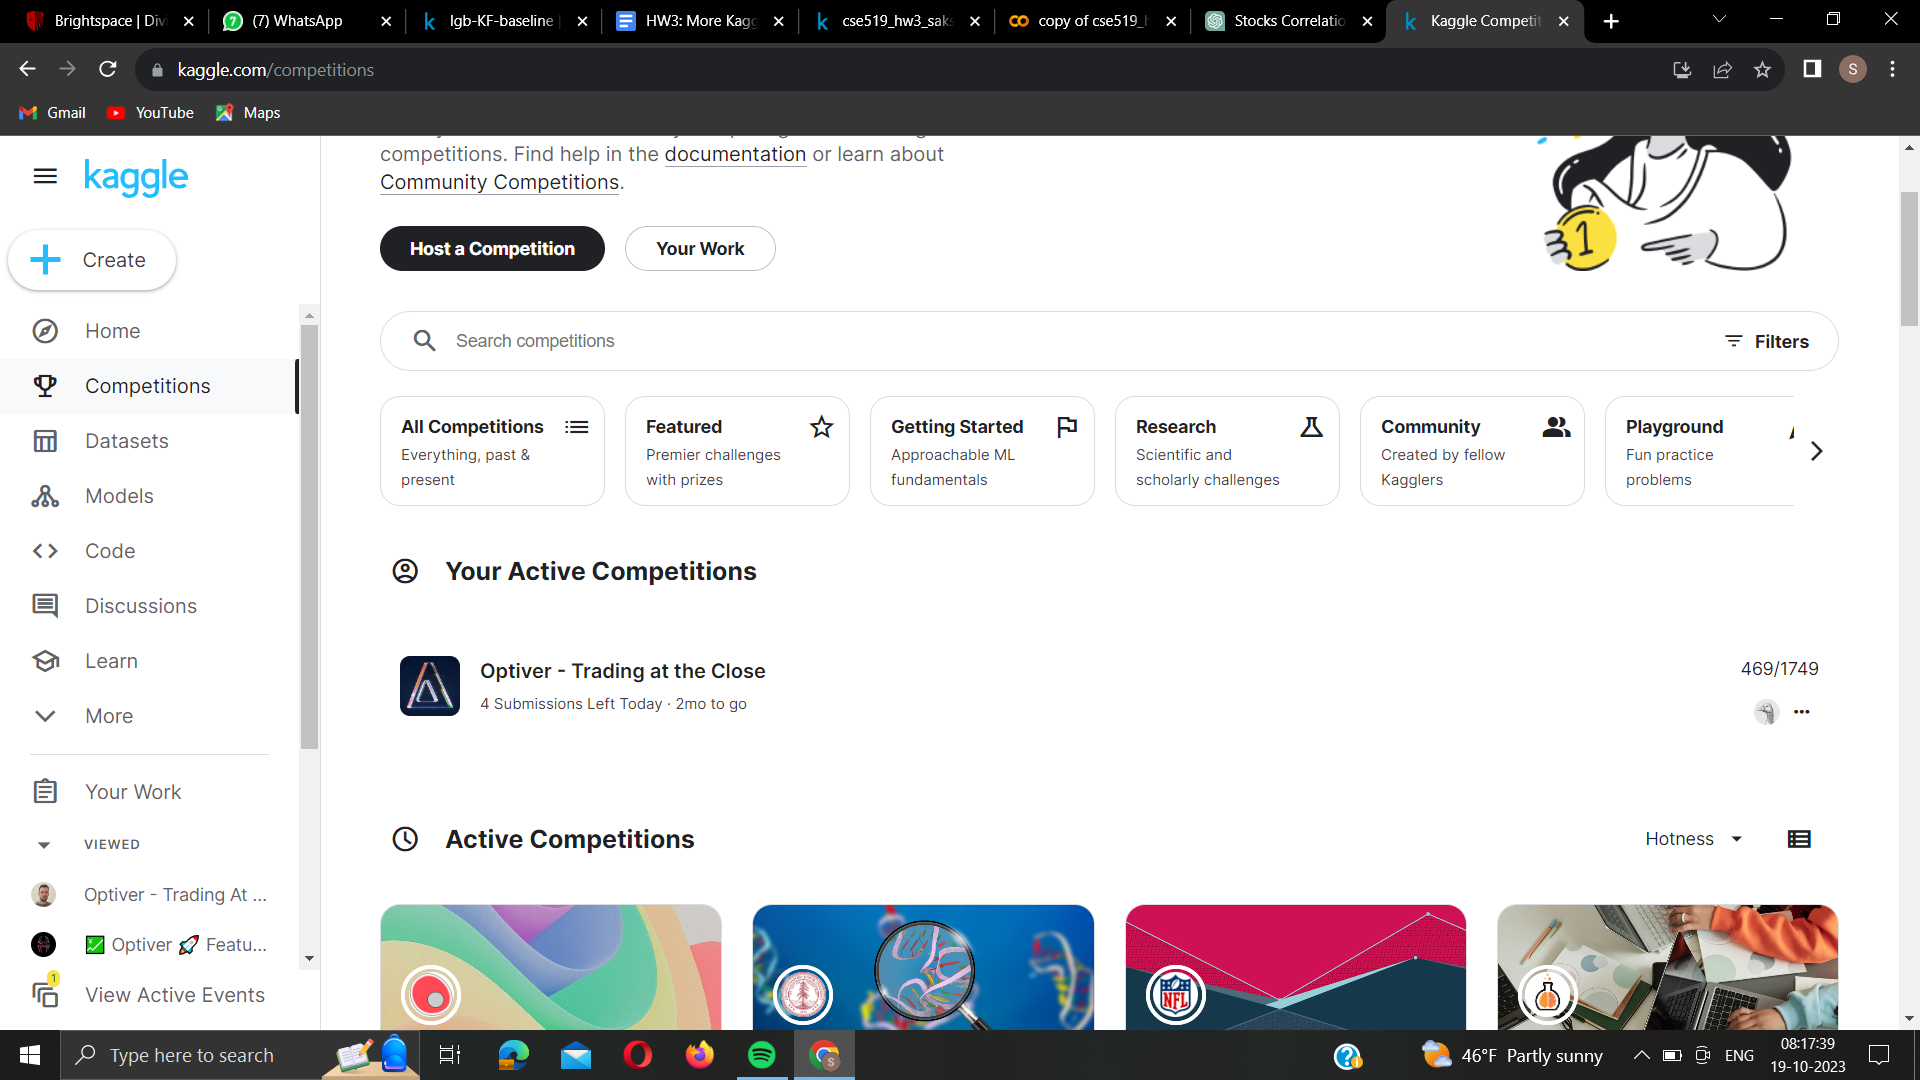
